In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader


In [2]:
train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [10]:
!unzip "Cat Emotions.v1-test.folder.zip"


Archive:  Cat Emotions.v1-test.folder.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: train/
   creating: train/Angry/
 extracting: train/Angry/100_a_jpeg.rf.be0c0e98a2d0222772725d46ec58a1d0.jpg  
 extracting: train/Angry/10_a_jpeg.rf.2d8101e0ce96c178a877b2c779e57a3a.jpg  
 extracting: train/Angry/11_a_jpeg.rf.8b325f1f3cd086204d56133aaa473871.jpg  
 extracting: train/Angry/14_a_jpeg.rf.15e889da9fbb5e3ef49a59e3bcfd845a.jpg  
 extracting: train/Angry/15_a_jpeg.rf.8a01f207087295147bccbd17533313b4.jpg  
 extracting: train/Angry/16_a_jpeg.rf.530fcf07121a58a49c240fc06d0feeda.jpg  
 extracting: train/Angry/18_a_jpeg.rf.6a68ac0345d3259a7ef8efeef501d360.jpg  
 extracting: train/Angry/21_a_jpeg.rf.544e274613d8ab0c1bb5e309a3dcdc37.jpg  
 extracting: train/Angry/22_a_jpeg.rf.994e9f4971e64b02409e01941b36bd13.jpg  
 extracting: train/Angry/23_a_jpeg.rf.e3048766506d5863c138e41ca44e4799.jpg  
 extracting: train/Angry/26_a_jpeg.rf.b26852ab14359ad0e557fadd60d

In [11]:
!ls


'Cat Emotions.v1-test.folder.zip'   README.roboflow.txt   train
 README.dataset.txt		    sample_data		  valid


In [12]:
!ls /content


'Cat Emotions.v1-test.folder.zip'   README.roboflow.txt   train
 README.dataset.txt		    sample_data		  valid


In [13]:
train_dir = "/content/train"
val_dir   = "/content/valid"


In [14]:
!ls /content/train


Angry  Disgusted  Happy  Normal  Sad  Scared  Surprised


In [15]:
from torchvision import datasets

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
val_data   = datasets.ImageFolder(val_dir,   transform=val_transform)

print("Classes:", train_data.classes)
print("Number of classes:", len(train_data.classes))


Classes: ['Angry', 'Disgusted', 'Happy', 'Normal', 'Sad', 'Scared', 'Surprised']
Number of classes: 7


In [16]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data,   batch_size=32, shuffle=False)


In [17]:
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)


torch.Size([32, 3, 224, 224]) torch.Size([32])


In [18]:
from torchvision.models import resnet18, ResNet18_Weights


In [19]:
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 126MB/s]


In [20]:
for param in model.parameters():
    param.requires_grad = False


In [21]:
for param in model.layer4.parameters():
    param.requires_grad = True


In [22]:
num_classes = len(train_data.classes)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)


In [23]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


CUDA available: True
GPU name: Tesla T4


In [24]:
device = torch.device("cuda:0")
model = model.to(device)

print("Model device:", next(model.parameters()).device)


Model device: cuda:0


In [25]:
epochs = 30

best_val_acc = 0.0
best_epoch = 0


In [26]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()


In [27]:
import torch.optim as optim

optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-4
)


In [28]:
print(model is not None)
print(criterion is not None)
print(optimizer is not None)


True
True
True


In [29]:
!ls


'Cat Emotions.v1-test.folder.zip'   README.roboflow.txt   train
 README.dataset.txt		    sample_data		  valid


In [30]:
!ls /content


'Cat Emotions.v1-test.folder.zip'   README.roboflow.txt   train
 README.dataset.txt		    sample_data		  valid


In [31]:
torch.save(model.state_dict(), "resnet18_current.pth")
print("✅ Model saved as resnet18_current.pth")


✅ Model saved as resnet18_current.pth


In [32]:
!ls *.pth


resnet18_current.pth


In [33]:
model = model.to(device)
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [34]:
def compute_accuracy(loader):
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    return 100 * correct / total


In [35]:
final_train_acc = compute_accuracy(train_loader)
final_val_acc   = compute_accuracy(val_loader)
gap = final_train_acc - final_val_acc

print(f"FINAL Train Accuracy: {final_train_acc:.2f}%")
print(f"FINAL Validation Accuracy: {final_val_acc:.2f}%")
print(f"Accuracy Gap: {gap:.2f}%")


FINAL Train Accuracy: 12.95%
FINAL Validation Accuracy: 10.06%
Accuracy Gap: 2.89%


In [36]:
if 10 <= gap <= 15:
    print("✅ Model is NOT overfitted (gap within 10–15%)")
elif gap > 15:
    print("⚠️ Model is overfitted")
else:
    print("⚠️ Model may be underfitted")


⚠️ Model may be underfitted


In [37]:
from torchvision.models import resnet18, ResNet18_Weights
import torch.nn as nn

weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)

for param in model.parameters():
    param.requires_grad = False

for param in model.layer4.parameters():
    param.requires_grad = True

num_classes = len(train_data.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)


In [38]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-4
)


In [39]:
epochs = 15
best_val_acc = 0.0

for epoch in range(epochs):

    model.train()
    train_correct, train_total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_total += labels.size(0)

    train_acc = 100 * train_correct / train_total

    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train: {train_acc:.2f}% | Val: {val_acc:.2f}%")

    # ✅ SAVE BEST MODEL
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "resnet18_best.pth")


Epoch 1/15 | Train: 32.67% | Val: 36.09%
Epoch 2/15 | Train: 68.53% | Val: 55.03%
Epoch 3/15 | Train: 75.90% | Val: 56.21%
Epoch 4/15 | Train: 85.66% | Val: 59.17%
Epoch 5/15 | Train: 90.04% | Val: 57.99%
Epoch 6/15 | Train: 93.23% | Val: 63.91%
Epoch 7/15 | Train: 95.22% | Val: 65.09%
Epoch 8/15 | Train: 97.21% | Val: 60.95%
Epoch 9/15 | Train: 97.01% | Val: 66.27%
Epoch 10/15 | Train: 97.21% | Val: 64.50%
Epoch 11/15 | Train: 99.00% | Val: 65.68%
Epoch 12/15 | Train: 98.41% | Val: 65.68%
Epoch 13/15 | Train: 99.60% | Val: 66.86%
Epoch 14/15 | Train: 99.00% | Val: 66.27%
Epoch 15/15 | Train: 99.20% | Val: 66.27%


In [40]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt


In [41]:
# Preprocessing pipeline (fixed, reused)
predict_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [42]:
def predict_emotion(image_path, show_image=True):
    """
    Input: path to image
    Output: predicted emotion
    """

    # Load image
    img = Image.open(image_path).convert("RGB")

    # Preprocess
    img_tensor = predict_transform(img)
    img_tensor = img_tensor.unsqueeze(0).to(device)

    # Predict
    model.eval()
    with torch.no_grad():
        outputs = model(img_tensor)
        _, predicted_class = torch.max(outputs, 1)

    predicted_label = train_data.classes[predicted_class.item()]

    # Display
    if show_image:
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Predicted Emotion: {predicted_label}")
        plt.show()

    return predicted_label


In [43]:
def predict_emotion(image_path):
    from PIL import Image
    import matplotlib.pyplot as plt
    import torch
    import torchvision.transforms as transforms

    # Preprocess
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])

    # Load image
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)

    # Predict
    model.eval()
    with torch.no_grad():
        outputs = model(img_tensor)
        _, pred = torch.max(outputs, 1)

    class_names = train_data.classes
    predicted_label = class_names[pred.item()]

    # PRINT OUTPUT (important)
    print("Predicted Emotion:", predicted_label)

    # SHOW IMAGE
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Emotion: {predicted_label}")
    plt.show()

    return predicted_label


Predicted Emotion: Disgusted


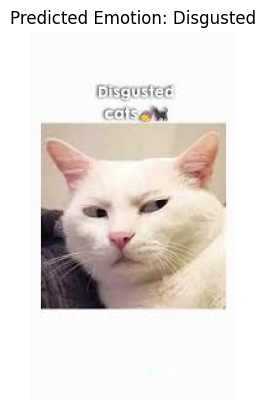

'Disgusted'

In [47]:
predict_emotion("disgust1.jpeg")

Predicted Emotion: Disgusted


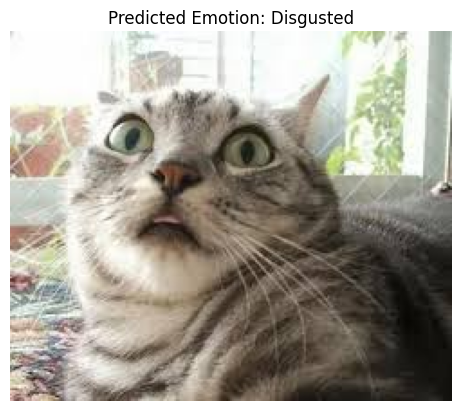

'Disgusted'

In [48]:
predict_emotion("WhatsApp Image 2026-01-11 at 12.20.34 PM (1).jpeg")

Predicted Emotion: Happy


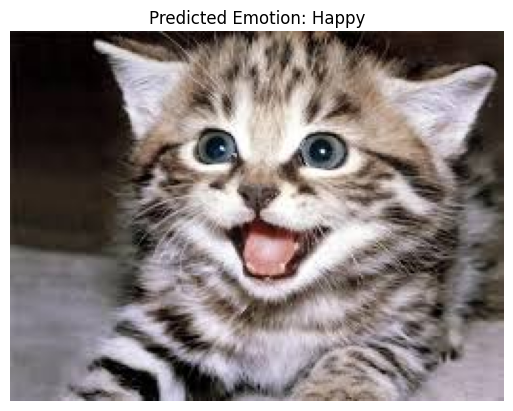

'Happy'

In [49]:
predict_emotion("WhatsApp Image 2026-01-11 at 12.20.34 PM.jpeg")


Predicted Emotion: Normal


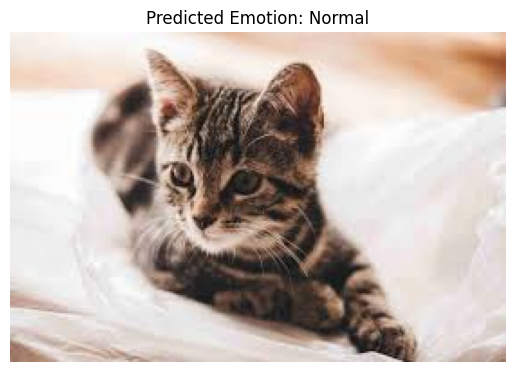

'Normal'

In [50]:
predict_emotion("WhatsApp Image 2026-01-11 at 12.20.35 PM (1).jpeg")

Predicted Emotion: Surprised


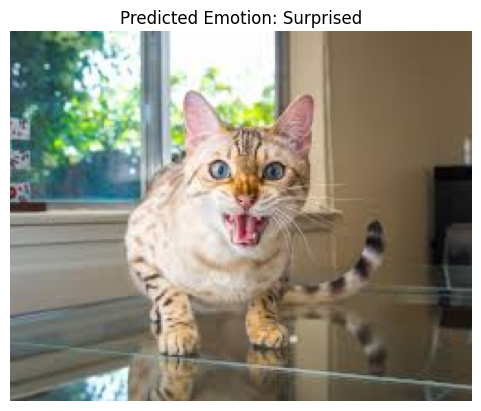

'Surprised'

In [51]:
predict_emotion("WhatsApp Image 2026-01-11 at 12.20.35 PM.jpeg")

Predicted Emotion: Disgusted


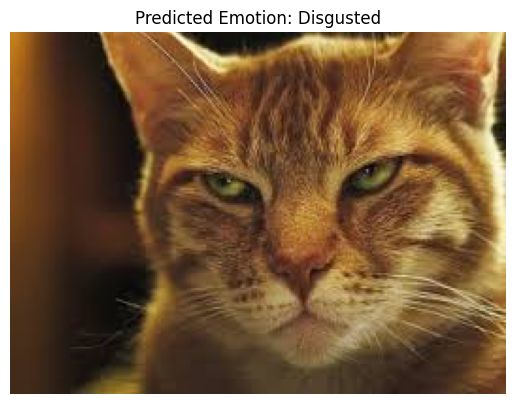

'Disgusted'

In [52]:
predict_emotion("WhatsApp Image 2026-01-11 at 12.20.36 PM.jpeg")

Predicted Emotion: Scared


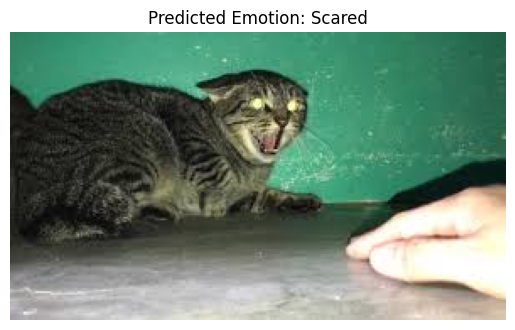

'Scared'

In [53]:
predict_emotion("WhatsApp Image 2026-01-11 at 12.20.38 PM (1).jpeg")

Predicted Emotion: Surprised


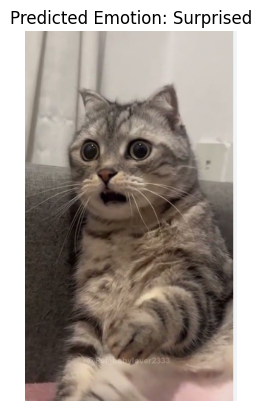

'Surprised'

In [54]:
predict_emotion("WhatsApp Image 2026-01-11 at 12.20.38 PM.jpeg")

Predicted Emotion: Happy


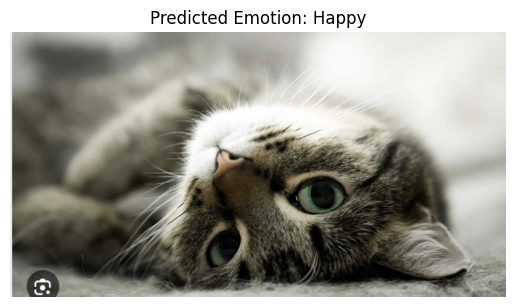

'Happy'

In [55]:
predict_emotion("WhatsApp Image 2026-01-11 at 12.20.39 PM (1).jpeg")

Predicted Emotion: Sad


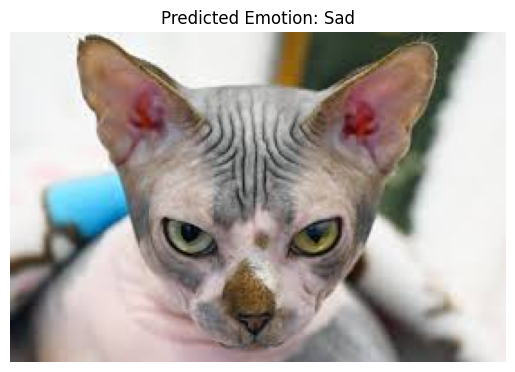

'Sad'

In [56]:
predict_emotion("WhatsApp Image 2026-01-11 at 12.20.39 PM (2).jpeg")

Predicted Emotion: Sad


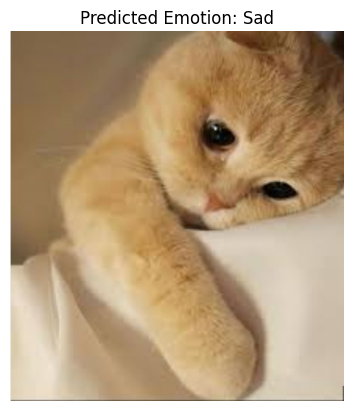

'Sad'

In [57]:
predict_emotion("WhatsApp Image 2026-01-11 at 12.20.39 PM.jpeg")

Predicted Emotion: Surprised


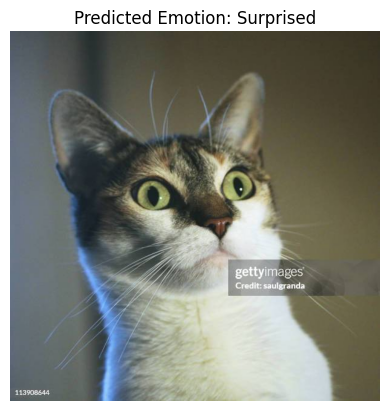

'Surprised'

In [60]:
predict_emotion("surprised1.jpg")

Predicted Emotion: Angry


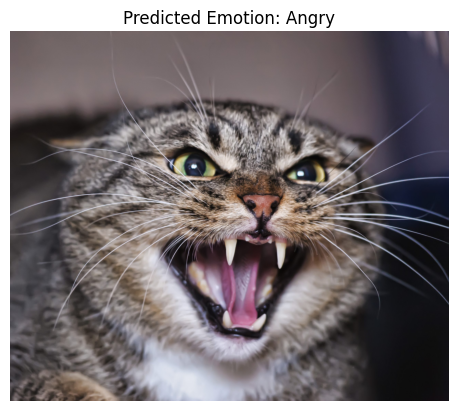

'Angry'

In [61]:
predict_emotion("angry1.jpeg")

Predicted Emotion: Disgusted


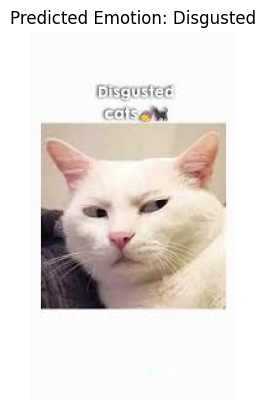

'Disgusted'

In [62]:
predict_emotion("disgust1.jpeg")

Predicted Emotion: Surprised


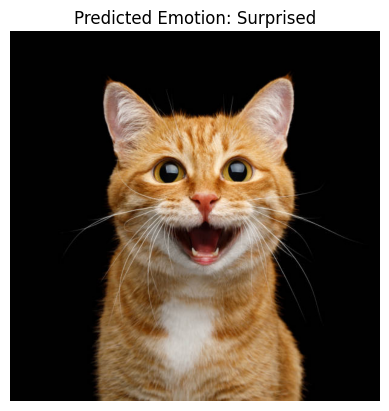

'Surprised'

In [63]:
predict_emotion("happy1.jpg")

Predicted Emotion: Scared


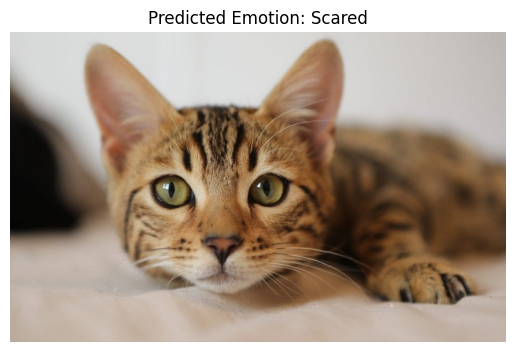

'Scared'

In [64]:
predict_emotion("normal1.jpg")

Predicted Emotion: Sad


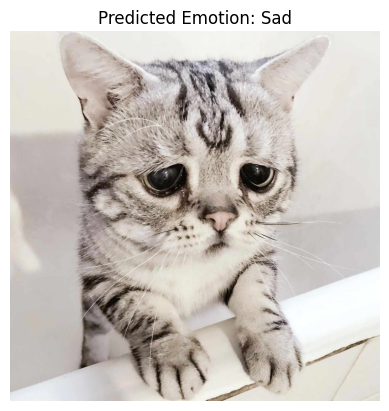

'Sad'

In [65]:
predict_emotion("sad1.jpg")

Predicted Emotion: Surprised


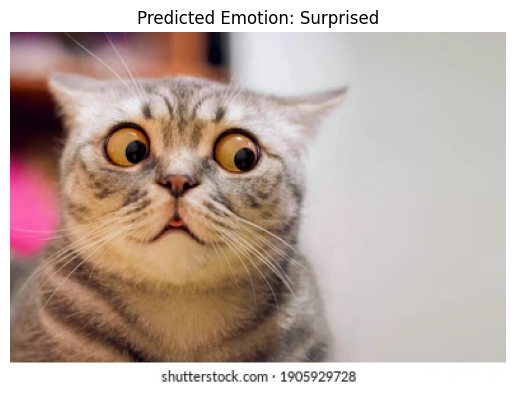

'Surprised'

In [66]:
predict_emotion("scared1.webp")

Predicted Emotion: Sad


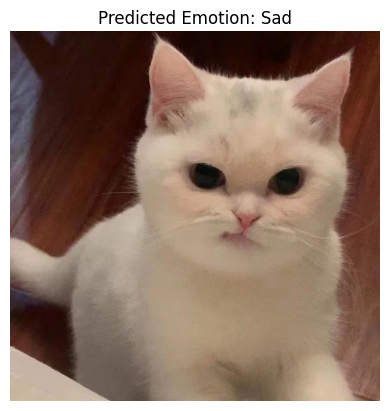

'Sad'

In [67]:
predict_emotion("disgust2.webp")

Predicted Emotion: Happy


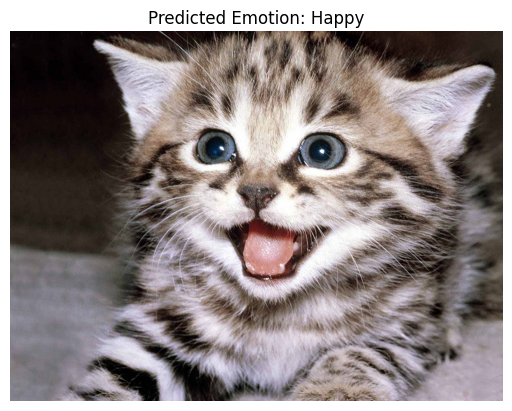

'Happy'

In [68]:
predict_emotion("happy2.jpg")

Predicted Emotion: Angry


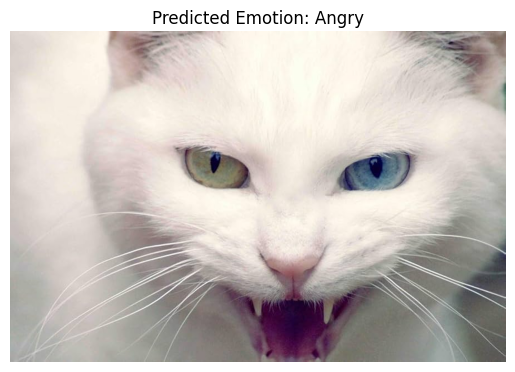

'Angry'

In [70]:
predict_emotion("angry4.jpg")

Predicted Emotion: Angry


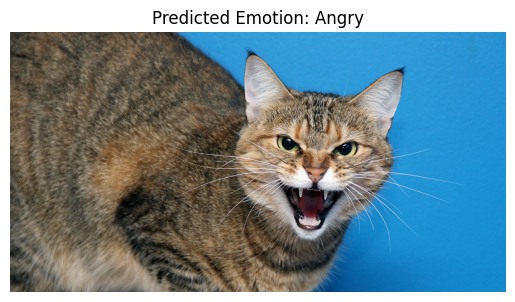

'Angry'

In [71]:
predict_emotion("angry5.jpg")

Predicted Emotion: Surprised


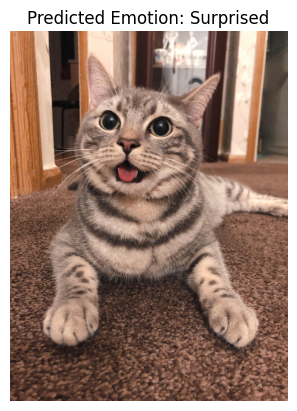

'Surprised'

In [72]:
predict_emotion("happy3.jpg")

Predicted Emotion: Happy


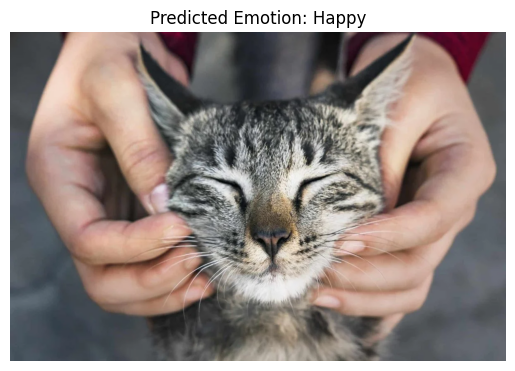

'Happy'

In [73]:
predict_emotion("happy4.webp")

Predicted Emotion: Normal


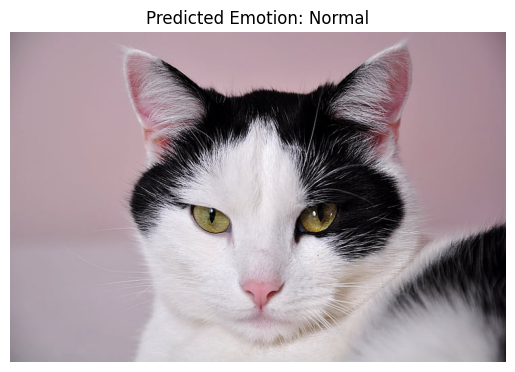

'Normal'

In [74]:
predict_emotion("normal2.jpg")

Predicted Emotion: Normal


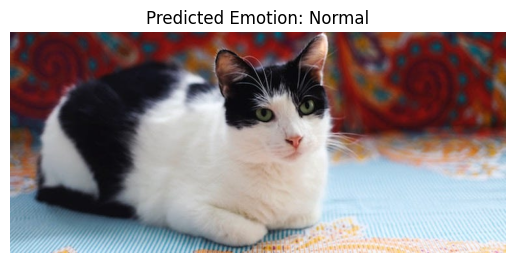

'Normal'

In [75]:
predict_emotion("normal3.jpg")

Predicted Emotion: Normal


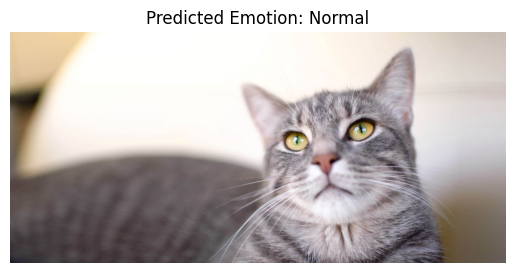

'Normal'

In [76]:
predict_emotion("normal4.jpg")

Predicted Emotion: Surprised


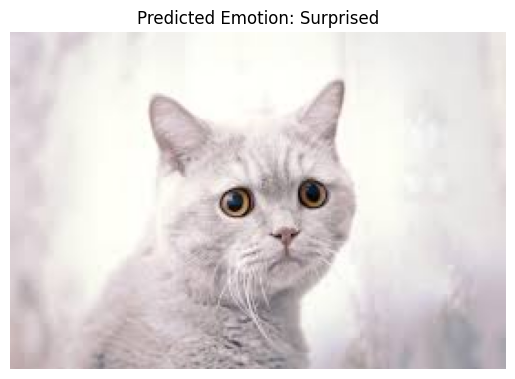

'Surprised'

In [77]:
predict_emotion("sad2.jpeg")

Predicted Emotion: Sad


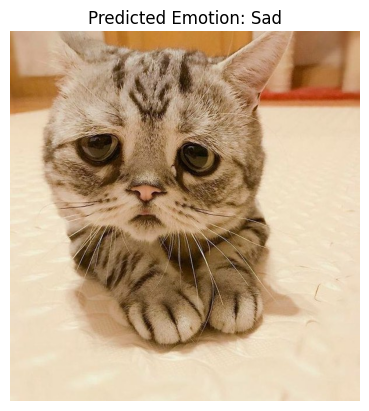

'Sad'

In [78]:
predict_emotion("sad3.jpeg")

Predicted Emotion: Scared


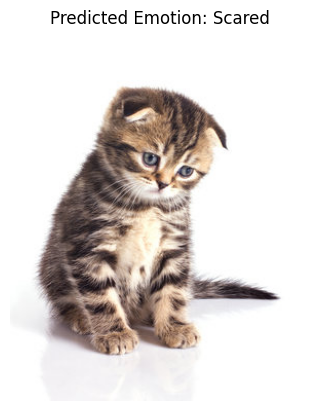

'Scared'

In [79]:
predict_emotion("sad4.jpg")

Predicted Emotion: Sad


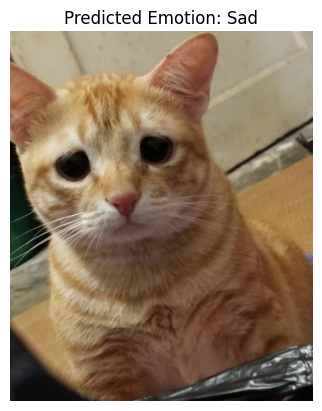

'Sad'

In [80]:
predict_emotion("sad5.webp")

Predicted Emotion: Scared


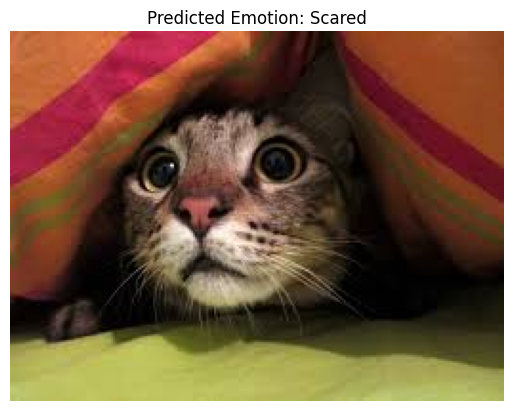

'Scared'

In [81]:
predict_emotion("scared2.jpeg")

Predicted Emotion: Scared


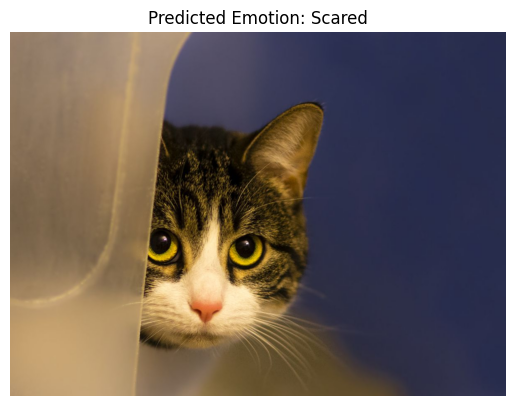

'Scared'

In [82]:
predict_emotion("scared3.jpg")

Predicted Emotion: Surprised


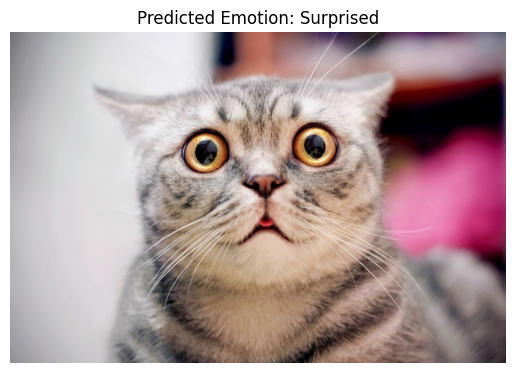

'Surprised'

In [83]:
predict_emotion("scared4.jpg")

Predicted Emotion: Surprised


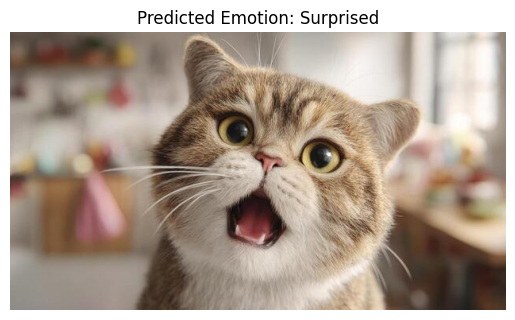

'Surprised'

In [84]:
predict_emotion("surprised2.jpg")

Predicted Emotion: Surprised


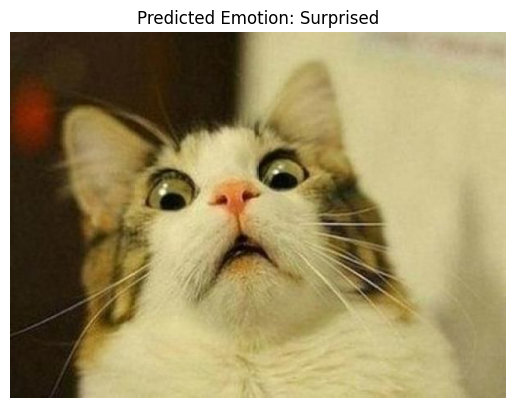

'Surprised'

In [85]:
predict_emotion("surprised3.jpg")

Predicted Emotion: Surprised


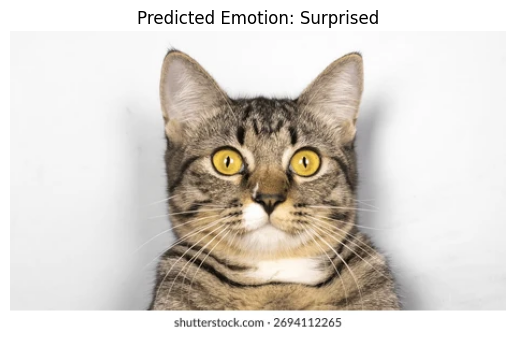

'Surprised'

In [86]:
predict_emotion("surprised4.webp")

Predicted Emotion: Surprised


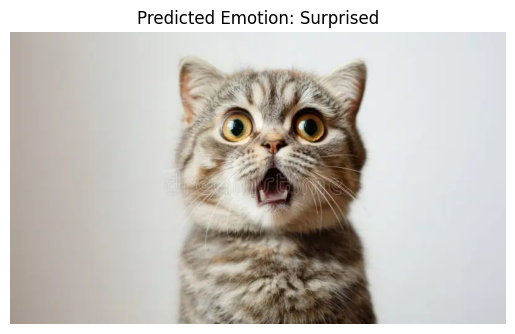

'Surprised'

In [87]:
predict_emotion("surprised5.webp")